In [35]:
# Cell 1: Basic imports and model test
import crflux.models as pm
import matplotlib.pyplot as plt
import numpy as np
import os
import MCEq.config as config
from MCEq.core import MCEqRun

print("Testing MCEq installation and model availability...")

# Test with a simple configuration first
try:
    # Test if basic MCEq works
    mceq_test = MCEqRun(
        interaction_model='SIBYLL23C',
        primary_model=(pm.HillasGaisser2012, "H4a"),
        theta_deg=0.0
    )
    print(" MCEq basic test PASSED")
    del mceq_test
except Exception as e:
    print(f"MCEq basic test FAILED: {e}")
    print("Please check your MCEq installation")

Testing MCEq installation and model availability...
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H4a
 MCEq basic test PASSED


In [37]:
# Cell 2: Test specific models
print(" Testing specific interaction models...")

target_models = ['SIBYLL23C', 'EPOSLHC', 'DPMJETIII191', 'DPMJETIII306']  # Use specific DPMJET versions
working_models = []

for model in target_models:
    try:
        print(f"Testing {model}...", end=" ")
        mceq_test = MCEqRun(
            interaction_model=model,
            primary_model=(pm.HillasGaisser2012, "H4a"),
            theta_deg=0.0
        )
        working_models.append(model)
        print("WORKS")
        del mceq_test
    except Exception as e:
        print(f" FAILED: {str(e)[:50]}")

print(f"\n Available models: {working_models}")

# If we don't have enough models, try alternatives
if len(working_models) < 2:
    print("\n Trying alternative model names...")
    alternatives = ['SIBYLL2.3c', 'EPOS-LHC', 'DPMJET-III', 'DPMJET3']
    for alt in alternatives:
        if alt not in target_models:
            try:
                print(f"Testing {alt}...", end=" ")
                mceq_test = MCEqRun(
                    interaction_model=alt,
                    primary_model=(pm.HillasGaisser2012, "H4a"),
                    theta_deg=0.0
                )
                working_models.append(alt)
                print(" WORKS")
                del mceq_test
            except:
                print(" FAILED")

print(f"\n Final working models: {working_models}")

if not working_models:
    print("CRITICAL: No interaction models are working!")
    print("Please check your MCEq installation and data files")

 Testing specific interaction models...
Testing SIBYLL23C... MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H4a
WORKS
Testing EPOSLHC... MCEqRun::set_interaction_model(): EPOSLHC
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H4a
WORKS
Testing DPMJETIII191... MCEqRun::set_interaction_model(): DPMJETIII191
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H4a
WORKS
Testing DPMJETIII306... MCEqRun::set_interaction_

In [41]:
# Cell 3: Setup and quick calculation (if models work)
if not working_models:
    print(" Cannot proceed - no working models found")
else:
    print(" Starting flux calculations...")
    
    # Use available models
    interaction_models = working_models[:3]  # Use up to 3 models
    print(f"Using models: {interaction_models}")
    
    # Simple setup for testing
    angles = [0.0, 45.0, 60.0]  # Just 3 angles for testing
    mag = 3
    
    p_spectrum_flux = []
    
    for int_model in interaction_models:
        print(f"\n Calculating {int_model}...")
        try:
            mceq_run = MCEqRun(
                interaction_model=int_model,
                primary_model=(pm.HillasGaisser2012, "H4a"),
                theta_deg=0.0
            )
            
            # Initialize flux storage
            flux = {
                'nue_total': np.zeros_like(mceq_run.e_grid),
                'nue_conv': np.zeros_like(mceq_run.e_grid),
                'nue_pr': np.zeros_like(mceq_run.e_grid)
            }
            
            # Calculate for each angle
            for theta in angles:
                print(f"  Angle {theta}°", end="\r")
                mceq_run.set_theta_deg(theta)
                mceq_run.solve()
                
                # Get electron neutrino fluxes
                flux['nue_total'] += (mceq_run.get_solution('total_nue', mag) + 
                                    mceq_run.get_solution('total_antinue', mag))
                flux['nue_conv'] += (mceq_run.get_solution('conv_nue', mag) + 
                                   mceq_run.get_solution('conv_antinue', mag))
                flux['nue_pr'] += (mceq_run.get_solution('pr_nue', mag) + 
                                 mceq_run.get_solution('pr_antinue', mag))
            
            # Average
            for key in flux:
                flux[key] /= len(angles)
            
            p_spectrum_flux.append((flux, int_model))
            print(f"  ✓ {int_model} completed successfully")
            
        except Exception as e:
            print(f"  ✗ Error in {int_model}: {e}")
            continue
    
    # Store energy grid if we have data
    if p_spectrum_flux:
        e_grid = mceq_run.e_grid
        print(f"\nSuccessfully calculated fluxes for {len(p_spectrum_flux)} models")
        print(f"Energy grid range: {e_grid[0]:.2e} - {e_grid[-1]:.2e} GeV")
    else:
        e_grid = None
        print("No flux data was successfully calculated")

 Starting flux calculations...
Using models: ['SIBYLL23C', 'EPOSLHC', 'DPMJETIII191']

 Calculating SIBYLL23C...
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H4a
  ✓ SIBYLL23C completed successfully

 Calculating EPOSLHC...
MCEqRun::set_interaction_model(): EPOSLHC
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H4a
  ✓ EPOSLHC completed successfully

 Calculating DPMJETIII191...
MCEqRun::set_interaction_model(): DPMJETIII191
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('

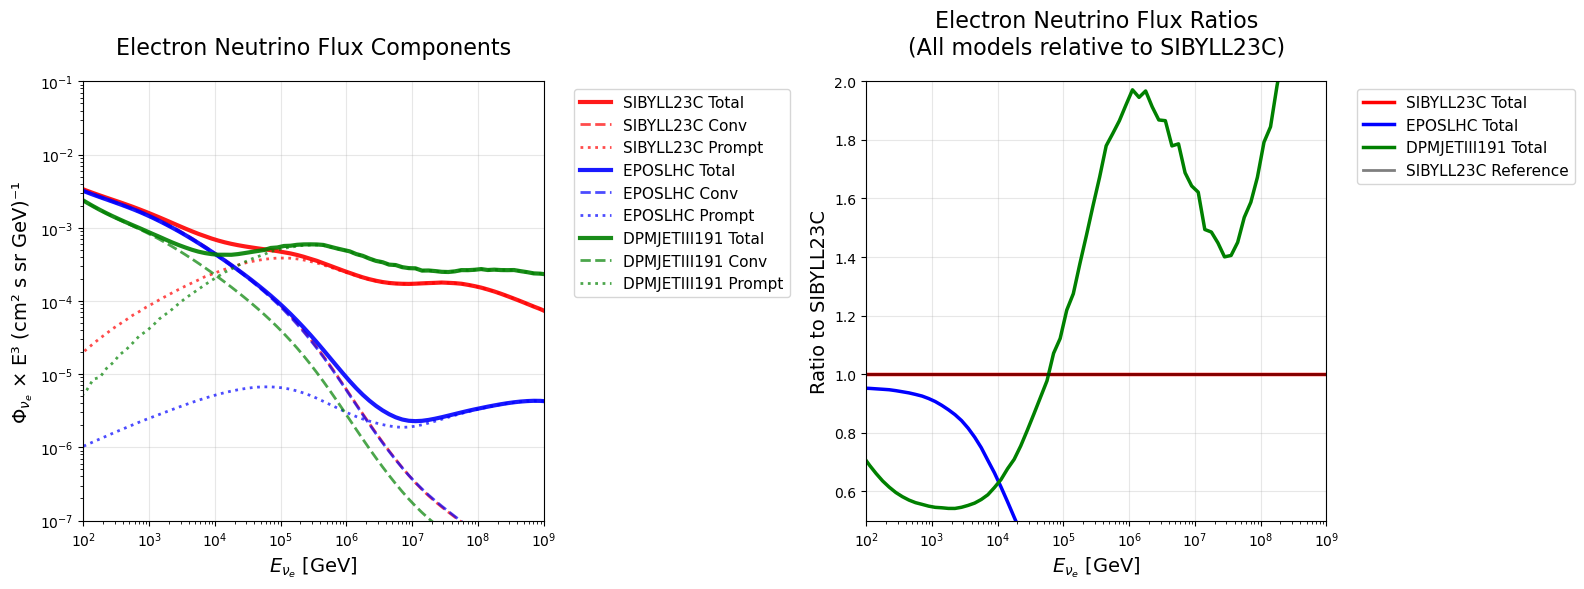

In [47]:
# Cell 4: Focused electron neutrino flux comparison
if 'p_spectrum_flux' in locals() and p_spectrum_flux and e_grid is not None:
    
    # Fixed color scheme: red, blue, green, black for each model in order
    color_sequence = ['red', 'blue', 'green', 'black']
    
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # GRAPH 1: Electron Neutrino Flux Components
    
    
    for i, (flux_data, model_name) in enumerate(p_spectrum_flux):
        color = color_sequence[i % len(color_sequence)]  # Cycle through colors if more than 4 models
        prompt_flux = flux_data['nue_pr']
        
        # Plot Total Electron Neutrino Flux (thick solid line)
        ax1.loglog(e_grid, flux_data['nue_total'], color=color, linewidth=3, 
                  linestyle='-', label=f'{model_name} Total', alpha=0.9)
        
        # Plot Conventional Electron Neutrino Flux (dashed line)
        ax1.loglog(e_grid, flux_data['nue_conv'], color=color, linewidth=2, 
                  linestyle='--', label=f'{model_name} Conv', alpha=0.7)
        
        # Plot Prompt Electron Neutrino Flux (dotted line)
        ax1.loglog(e_grid, prompt_flux, color=color, linewidth=2, 
                  linestyle=':', label=f'{model_name} Prompt', alpha=0.7)
    
    ax1.set_ylabel(r'$\Phi_{\nu_e}$ × E³ (cm² s sr GeV)⁻¹', fontsize=14)
    ax1.set_xlabel(r'$E_{\nu_e}$ [GeV]', fontsize=14)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
    ax1.set_title('Electron Neutrino Flux Components', fontsize=16, pad=20)
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(1e2, 1e9)
    ax1.set_ylim(1e-7, 1e-1)
    
    # GRAPH 2: Electron Neutrino Flux Ratios (all vs SIBYLL)
    # Find SIBYLL reference
    ref_model = None
    ref_flux_total = None
    
    for flux_data, model_name in p_spectrum_flux:
        if 'SIBYLL' in model_name.upper():
            ref_model = model_name
            ref_flux_total = flux_data['nue_total']
            break
    
    if ref_model is None:
        ref_model = p_spectrum_flux[0][1]
        ref_flux_total = p_spectrum_flux[0][0]['nue_total']
    
    
    # Plot ratios for ALL models
    for i, (flux_data, model_name) in enumerate(p_spectrum_flux):
        color = color_sequence[i % len(color_sequence)]
        
        # Calculate electron neutrino flux ratios
        ratio_total = flux_data['nue_total'] / ref_flux_total
        
        # Plot ratio
        ax2.semilogx(e_grid, ratio_total, color=color, linewidth=2.5, 
                    linestyle='-', label=f'{model_name} Total')
            
    # Reference line
    ax2.axhline(1.0, color='black', linestyle='-', alpha=0.5, linewidth=2, 
               label=f'{ref_model} Reference')
    
    ax2.set_ylabel(f'Ratio to {ref_model}', fontsize=14)
    ax2.set_xlabel(r'$E_{\nu_e}$ [GeV]', fontsize=14)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
    ax2.set_title(f'Electron Neutrino Flux Ratios\n(All models relative to {ref_model})', 
                 fontsize=16, pad=20)
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(1e2, 1e9)
    ax2.set_ylim(0.5, 2)  # Reasonable range for ratios
    
    plt.tight_layout()
    
    # Save the plot
    desktop = os.path.join(os.path.expanduser("~"), "Desktop")
    save_path = os.path.join(desktop, 'electron_neutrino_flux_comparison.pdf')
    plt.savefig(save_path, bbox_inches='tight', dpi=300, facecolor='white')
    
    
    plt.show()
    
else:
    print("Cannot create plots - no flux data available")